In [1]:
#Import necessary packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

!pip install wordcloud
from wordcloud import WordCloud

!pip install textblob
!pip install lexicalrichness

In [2]:
%run TrainToDTM.ipynb

In [3]:
train = pd.read_csv('train.csv')
dtm = pd.read_csv('dtm.csv')

In [4]:
#Get string with list of words used in effective, ineffective, and adequate discourse
effective_str = clean_text(train.discourse_text.where(train.discourse_effectiveness == 'Effective').dropna().to_string(header = False, index = False))
adequate_str = clean_text(train.discourse_text.where(train.discourse_effectiveness == 'Adequate').dropna().to_string(header = False, index = False))
ineffective_str = clean_text(train.discourse_text.where(train.discourse_effectiveness == 'Ineffective').dropna().to_string(header = False, index = False))

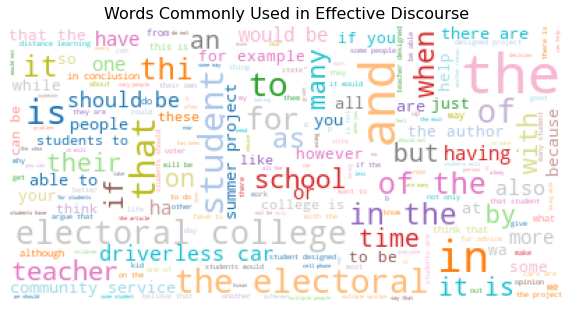

In [5]:
wc_effective = WordCloud(background_color="white", 
               max_font_size=40, 
               relative_scaling=0.6, 
               colormap = 'tab20',
              stopwords = ['t', 'th', 'f', 'w', 'h', 's', 'i', 'o', 'a']).generate(effective_str)
plt.figure(figsize = (10, 10))
plt.imshow(wc_effective)
plt.title("Words Commonly Used in Effective Discourse", {'fontsize': 16})
plt.axis("off")
plt.show()

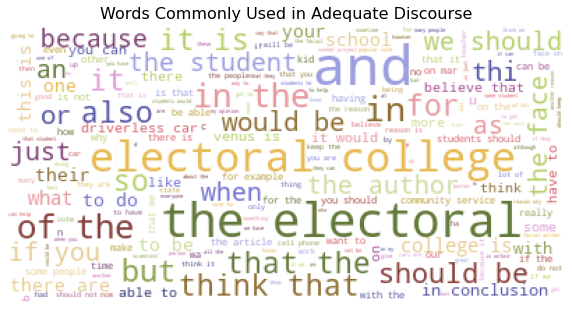

In [6]:
wc_adequate = WordCloud(background_color="white", 
               max_font_size=40, 
               relative_scaling= 0.6, 
               colormap = 'tab20b',
              stopwords = ['t', 'th', 'f', 'w', 'h', 's', 'i', 'o', 'a']).generate(adequate_str)
plt.figure(figsize = (10, 10))
plt.imshow(wc_adequate)
plt.title("Words Commonly Used in Adequate Discourse", {'fontsize': 16})
plt.axis("off")
plt.show()

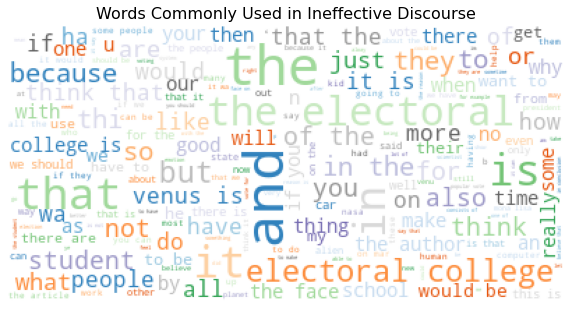

In [7]:
wc_ineffective = WordCloud(background_color="white", 
               max_font_size=40, 
               relative_scaling= 0.6, 
               colormap = 'tab20c',
              stopwords = ['t', 'th', 'f', 'w', 'h', 's', 'i', 'o', 'a']).generate(ineffective_str)
plt.figure(figsize = (10, 10))
plt.imshow(wc_ineffective)
plt.title("Words Commonly Used in Ineffective Discourse", {'fontsize': 16})
plt.axis("off")
plt.show()

In [8]:
from lexicalrichness import LexicalRichness

#Function to obtain type token ratio of each discourse sample
def ttr(text):
    lex = LexicalRichness(text)
    return lex.ttr

#Function to obtain measure of textual lexical density of each discourse sample
def f_mtld(text):
    lex = LexicalRichness(text)
    return lex.mtld(threshold = 0.72)

#Function to obtain lexical diversity (Summer's measure) of each discourse sample
def dugast(text):
    lex = LexicalRichness(text)
    try:
        return lex.Dugast
    except:
        return 0

#Create dataframe with discourse type, discourse effectiveness, ttr, and herdan lexical diversity
lex_measures = pd.DataFrame(columns = ['text', 'discourse_type', 'discourse_effectiveness', 'ttr', 'lex_diversity', 'dugast'])
lex_measures.text = train.discourse_text
lex_measures.discourse_type = train.discourse_type
lex_measures.discourse_effectiveness = train.discourse_effectiveness
lex_measures.ttr = lex_measures.text.transform(ttr)
lex_measures.lex_diversity = lex_measures.text.transform(f_mtld)
lex_measures.dugast = lex_measures.text.apply(dugast)

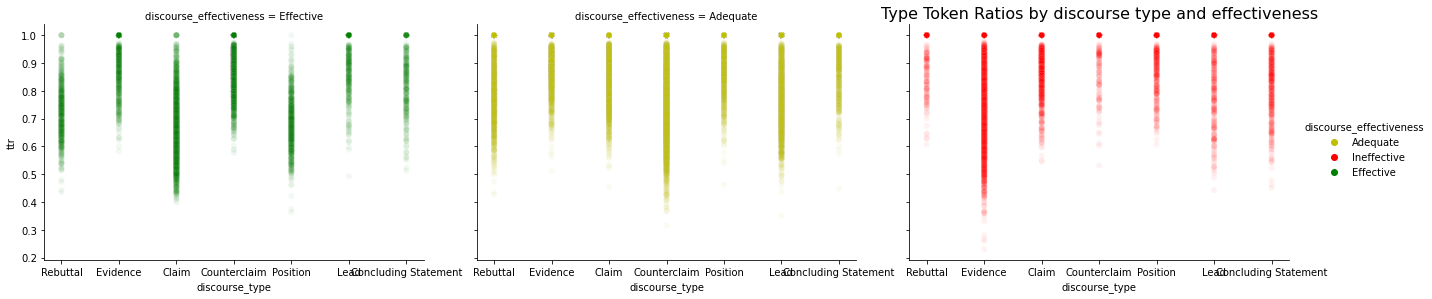

In [15]:
sns.relplot(data = lex_measures,
           x = 'discourse_type',
           y = 'ttr',
           col = 'discourse_effectiveness',
           col_order = ['Effective', 'Adequate', 'Ineffective'],
           height = 4,
           aspect = 1.5,
           alpha = 0.05,
           hue = 'discourse_effectiveness',
           palette = {'Effective':'g','Adequate':'y','Ineffective':'r'}
           )
plt.title("Type Token Ratios by discourse type and effectiveness", {'fontsize': 16})
plt.show()

Noteworthy results: Effective discourse contains relatively low lexical diversity for claims, positions and rebuttals, as measured by the type token ratio.

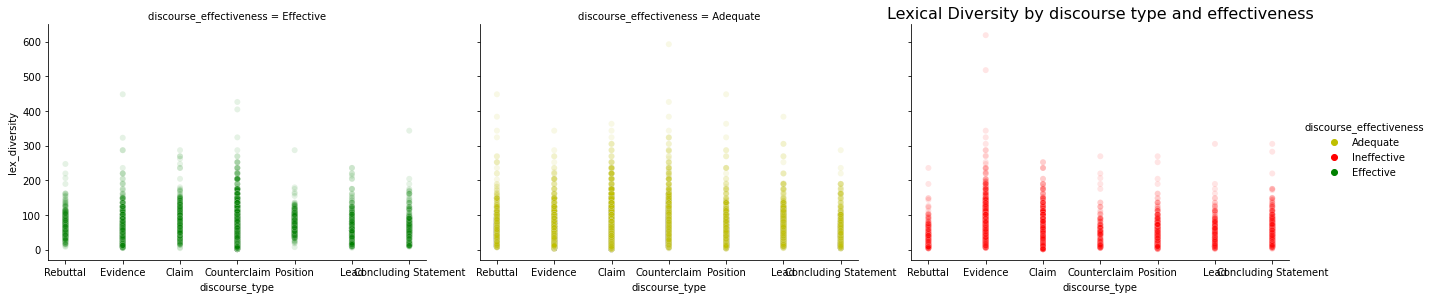

In [12]:
sns.relplot(data = lex_measures,
           x = 'discourse_type',
           y = 'lex_diversity',
           col = 'discourse_effectiveness',
           col_order = ['Effective', 'Adequate', 'Ineffective'],
           height = 4,
           aspect = 1.5,
           alpha = 0.1,
           hue = 'discourse_effectiveness',
           palette = {'Effective':'g','Adequate':'y','Ineffective':'r'}
           )
plt.title("Lexical Diversity by discourse type and effectiveness", {'fontsize': 16})
plt.show()

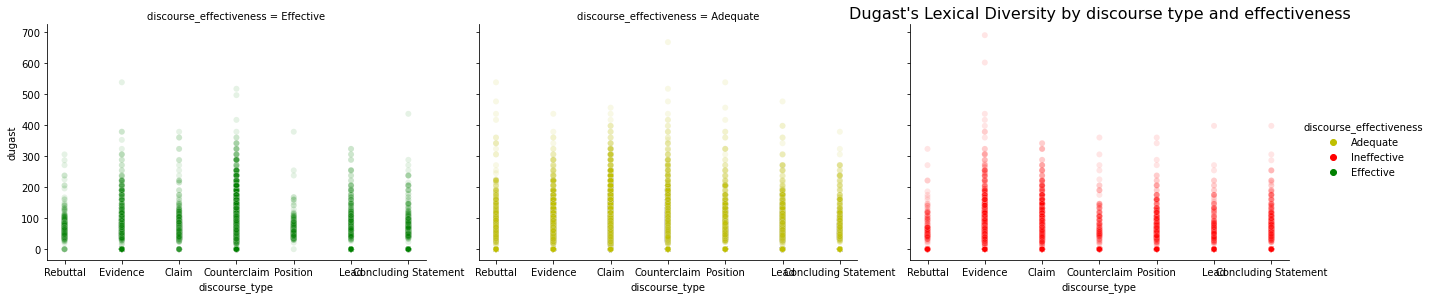

In [13]:
sns.relplot(data = lex_measures,
           x = 'discourse_type',
           y = 'dugast',
           col = 'discourse_effectiveness',
           col_order = ['Effective', 'Adequate', 'Ineffective'],
           height = 4,
           aspect = 1.5,
           alpha = 0.1,
           hue = 'discourse_effectiveness',
           palette = {'Effective':'g','Adequate':'y','Ineffective':'r'}
           )
plt.title("Dugast's Lexical Diversity by discourse type and effectiveness", {'fontsize': 16})
plt.show()